<img src="tic3151.png" style="height: 70px; width: 200px" align=left> 
<img src="logo-MMU.png" style="height: 70px; width: 200px" align=right> 

### Team members

Ahmad Ayaan - 1191302794 

Salah Fayeq y. AlHaismawi - 1201303035

Aisha Sakinah Binti Saadon - 1191101867

Aryssa Amanda Binti Azhar - 1191100575


### The assignment contains following questions


# Installing Libraries

##### Note: Uncomment the code the code to install the relevant libraries

In [59]:
# pip install matplotlib.pyplot
# pip install ortools
# pip install pulp

SyntaxError: invalid syntax (<ipython-input-59-54c4d1f45157>, line 2)

# Importing Libraries

In [77]:
from random import randint
import random
from tabulate import tabulate
import matplotlib.pyplot as plt
import constraint
import pulp
from ortools.sat.python import cp_model

# Question 1

Year-end school holiday is coming soon. A kindergarten teacher would like to give each
of the student in her class, an amazing holiday set by November 2023. There are 25
students in her class consisting of 15 girls and 10 boys. She has approached you for
help and provided the following details to you:

• Budget for 25 holiday sets = RM 200.00

• Each holiday set must be wrapped using a sheet of paper i.e. blue wrapper for
boy’s holiday set and pink wrapper for girl’s holiday set. Each wrapper cost
RM1.00

• Each holiday set should have at least 2 items being stationery



## Variables Declaration

In [3]:
# Constant variables
budget = 200.00
minimum_stationary_item = 2
wrapper_cost = 1.00

# List of items and their prices
items = [
    ("Chipsmore Biscuit", 2.00),
    ("2B pencil", 1.00),
    ("Color pencil", 3.00),
    ("Magic pen", 3.00),
    ("Potato chip", 2.00),
    ("Milo packet", 1.00),
    ("Mini sketch book", 2.00),
    ("Milk biscuit", 3.00)
]

mutation_rate = 0.1
wrapper_cost = 1 * 25  # Wrapper cost for 25 sets

## Population and Individuals



In [4]:
def individuals():
    return [random.randint(0, 1) for items in range(len(items))]

def generate_population(population_size):
    return [individuals() for x in range(population_size)]

## Fitness Function

The fitness function calculates the total cost of items in a chromosome, after deducting the cost of wrappers and ensuring that atleast 2 of the items are stationery.

In [5]:
def fitness_function(chromosome):
    total = 0
    num_stationery_items = 0
    num_items = 0
    for i, j in enumerate(chromosome):
        if j == 1:
            # to calculate the total cost of the items present in the set
            total += items[i][1]
            num_items += 1
            # to check if the current sets have stationery
            if items[i][0] in ["2B pencil", "Color pencil", "Magic pen", "Mini sketch book"]:
                num_stationery_items += 1

    if num_stationery_items >= 2 and (total*25) + wrapper_cost <=budget:
         # Calculate the fitness score based on the weighted sum of total cost and number of items
        total_score = total * num_items
        items_score = num_items * 10
        score = total_score + items_score
        #print(score)
        return score
    else:
        return 0 if total <= 200 else -1

## Selection Function

In [6]:
"""Perform selection using roulette wheel selection."""
def selection_roulette_wheel(population, fitness_values):
    total_fitness = sum(fitness_values)
    if total_fitness == 0:
        probabilities = [1 / len(population)] * len(population)
    else:
        probabilities = [fitness / total_fitness for fitness in fitness_values]
    selected = random.choices(population, weights=probabilities, k=2)
    return selected[0], selected[1]


"""Perform selection using rank selection."""
def selection_rank(population, fitness_values):
    ranked_population = sorted(zip(population, fitness_values), key=lambda x: x[1], reverse=True)
    selected = []
    while len(selected) < 2:
        for chromosome, fitness in ranked_population:
            if fitness > 0:  # Select only individuals with positive fitness
                selected.append(chromosome.copy())
                if len(selected) == 2:
                    break
    return selected[0], selected[1]


## Crossover Function

In [7]:
"""Perform crossover using single point crossover."""
def crossover_single_point(parent1, parent2):
    single_point = random.randint(1, len(parent1) - 1)
    child1 = parent1[:single_point] + parent2[single_point:]
    child2 = parent2[:single_point] + parent1[single_point:]
    return child1, child2

"""Perform crossover using two point crossover."""
def crossover_two_point(parent1, parent2):
    two_point = sorted(random.sample(range(len(parent1)), 2))
    child1 = parent1[:two_point[0]] + parent2[two_point[0]:two_point[1]] + parent1[two_point[1]:]
    child2 = parent2[:two_point[0]] + parent1[two_point[0]:two_point[1]] + parent2[two_point[1]:]
    return child1, child2

## Mutation Function

In [8]:
"""Perform inversion mutation."""
def mutation_inversion(chromosome):
    start = random.randint(0, len(chromosome) - 1)
    end = random.randint(start + 1, len(chromosome))
    mutated_chromosome = chromosome[:start] + chromosome[start:end][::-1] + chromosome[end:]
    return mutated_chromosome

"""Perform bit flipping mutation."""
def mutation_bit_flip(chromosome):
    mutated_chromosome = chromosome[:]
    for i in range(len(mutated_chromosome)):
        if random.random() < mutation_rate:
            mutated_chromosome[i] = 1 - mutated_chromosome[i]
    return mutated_chromosome

## Main Function

In [9]:
def evolve(population, fitness_values, selection_method, crossover_method, mutation_method):
    next_generation = []
    while len(next_generation) < 25:
        parent1, parent2 = selection_method(population, fitness_values)
        #print(parent1, parent2)
        offspring1, offspring2 = crossover_method(parent1, parent2)
        #print(offspring1, offspring2)
        offspring1 = mutation_method(offspring1)
        offspring2 = mutation_method(offspring2)
        next_generation.extend([offspring1, offspring2])
        #print(next_generation)
    return next_generation[:25]


In [10]:
def main(selection_method, crossover_method, mutation_method):
    # Generate an initial population
    population = generate_population(25)
    
    # Calculate fitness values for each chromosome
    fitness_values = [fitness_function(chromosome) for chromosome in population]
    fitness_history = []

    best_fitness = float('inf')
    best_combination = []

    for generation in range(100):
        # Select parents and perform crossover and mutation
        population = evolve(population, fitness_values, selection_method, crossover_method, mutation_method)

        # Calculate fitness values for each chromosome
        fitness_values = [fitness_function(chromosome) for chromosome in population]
        fitness_history.append(max(fitness_values))

       # Find the best fitness value and corresponding combination
    best_fitness = max(fitness_values)
    best_combination = population[fitness_values.index(best_fitness)].copy()


    # Display the total combination and the content of the combination
    print("Total Combination of Items: ")
    total_combination = sum(best_combination)
    print(total_combination)

    print("Content of the Combination of Items:")
    selected_items = []
    unit_price = 0
    for i, item in enumerate(best_combination):
        if item == 1:
            item_name = items[i][0]
            item_price = items[i][1]
            unit_price += item_price
            selected_items.append([item_name, item_price])
            
    selected_items.append(['Wrapper cost', '1'])
    unit_price +=1
    print(tabulate(selected_items, headers=["Item Name", "Price (RM)"], tablefmt="grid"))

    print("Unit Price: ")
    print(unit_price if best_fitness >= 0 else 0)
    
    print("Total Price: ")
    print(unit_price * 25 if best_fitness >= 0 else 0)
    
    return best_combination, fitness_history


## Perfomance Assessment



In [11]:
# Test 1
print("Best holiday set (Selection Method: Ranked, Crossover Method: Single Point, Mutation Method: Inversion):")
print()
best_holiday_set_1, fitness_history_1 = main(selection_roulette_wheel, crossover_two_point, mutation_bit_flip)

Best holiday set (Selection Method: Ranked, Crossover Method: Single Point, Mutation Method: Inversion):

Total Combination of Items: 
4
Content of the Combination of Items:
+-------------------+--------------+
| Item Name         |   Price (RM) |
+===================+==============+
| Chipsmore Biscuit |            2 |
+-------------------+--------------+
| 2B pencil         |            1 |
+-------------------+--------------+
| Color pencil      |            3 |
+-------------------+--------------+
| Milo packet       |            1 |
+-------------------+--------------+
| Wrapper cost      |            1 |
+-------------------+--------------+
Unit Price: 
8.0
Total Price: 
200.0


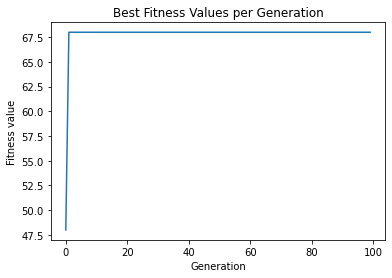

In [12]:
x = range(0,len(fitness_history_1))
y = fitness_history_1

plt.plot(x, y)

plt.title("Best Fitness Values per Generation")
plt.xlabel("Generation")
plt.ylabel("Fitness value")

plt.show()

## Summary


# Question 2



## OrTools Library

In [82]:
slots = [1, 2, 3, 4, 5, 6]
# Define the teams, days, and slots
teams = [1, 2, 3, 4, 5, 6, 7]
days = [1, 2, 3, 4]
def solve_dodol_feast():



    # Create the CP-SAT model
    model = cp_model.CpModel()

    # Create the decision variables
    variables = {}
    for day in days:
        for slot in slots:
            for team in teams:
                variables[(day, slot, team)] = model.NewBoolVar(f'time_{team}_{day}_{slot}')

    # Constraint 1: Each team must stir the pot for at least 8 hours during the feast
    for team in teams:
        model.Add(sum(variables[(day, slot, team)] for day in days for slot in slots) >= 2)

    # Constraint 2: No team should stir the pot for more than 4 hours a day
    for day in days:
        for team in teams:
            model.Add(sum(variables[(day, slot, team)] for slot in slots) <= 1)

    # Constraint 3: No team should stir the pot consecutively
    for day in days:
        for slot in slots[1:]:
            for team in teams:
                model.Add(variables[(day, slot, team)] <= sum(variables[(day, slot - 1, t)] for t in teams if t != team))

    # Constraint 4: Only one team should stir the pot in each time slot
    for day in days:
        for slot in slots:
            model.Add(sum(variables[(day, slot, team)] for team in teams) == 1)

    # Create the objective variable
    objective_var = model.NewIntVar(0, len(days) * len(slots) * len(teams), 'objective')

    # Constraint 5: Minimize the total number of team assignments
    model.Add(objective_var == sum(variables[(day, slot, team)] for day in days for slot in slots for team in teams))

    # Set the objective function
    model.Minimize(objective_var)

    # Create the solver and solve the model
    solver = cp_model.CpSolver()
    solver.parameters.log_search_progress = True
    status = solver.Solve(model)

    # Check if a solution is found
    if status != cp_model.OPTIMAL:
        print("No feasible solution found.")
        return None

    # Extract the solution
    solution = {}
    for day in days:
        for slot in slots:
            for team in teams:
                if solver.BooleanValue(variables[(day, slot, team)]):
                    solution[(day, slot)] = team
                    
    return solution

# Solve the dodol feast problem
solution = solve_dodol_feast()

# Print the solution
if solution:
    # Create a table to display the feast schedule
    table = []
    for day in days:
        row = [f"Day {day}"]
        for slot in slots:
            team = solution.get((day, slot), "-")
            row.append(f"Team {team}")
        table.append(row)

    # Display the feast schedule table
    headers = [""] + [f"Time Slot {slot}" for slot in slots]
    print("Feast schedule:")
    print(tabulate(table, headers=headers, showindex=False, tablefmt="grid"))


Feast schedule:
+-------+---------------+---------------+---------------+---------------+---------------+---------------+
|       | Time Slot 1   | Time Slot 2   | Time Slot 3   | Time Slot 4   | Time Slot 5   | Time Slot 6   |
+=======+===============+===============+===============+===============+===============+===============+
| Day 1 | Team 7        | Team 1        | Team 3        | Team 4        | Team 6        | Team 5        |
+-------+---------------+---------------+---------------+---------------+---------------+---------------+
| Day 2 | Team 5        | Team 4        | Team 6        | Team 2        | Team 1        | Team 7        |
+-------+---------------+---------------+---------------+---------------+---------------+---------------+
| Day 3 | Team 6        | Team 3        | Team 4        | Team 2        | Team 1        | Team 5        |
+-------+---------------+---------------+---------------+---------------+---------------+---------------+
| Day 4 | Team 7        | Team

## Pulp Library

In [76]:
# Create a problem instance
problem = pulp.LpProblem("DodolFeast", pulp.LpMinimize)

# Define the variables and domains
teams = [1, 2, 3, 4, 5, 6, 7]
days = [1, 2, 3, 4]
time_slots = [1, 2, 3, 4, 5, 6]

# Define the decision variables
x = pulp.LpVariable.dicts("TeamAssignment", (days, time_slots, teams), cat="Binary")

# Define the constraints
for day in days:
    # Constraint 1: Each team stirs the pot of dodol for four hours at a time
    for time_slot in time_slots:
        problem += pulp.lpSum(x[day][time_slot][team] for team in teams) == 1

for time_slot in time_slots:
    # Constraint 2: No team stirs the pot of dodol for more than four hours a day
    for day in days:
        problem += pulp.lpSum(x[day][time_slot][team] for team in teams) <= 1

# Constraint 3: Each team stirs the pot of dodol for at least 2 slots during the entire feast
for team in teams:
    problem += pulp.lpSum(x[day][time_slot][team] for day in days for time_slot in time_slots) >= 2

# Constraint 4: No team can be assigned to multiple time slots on the same day
for day in days:
    for team in teams:
        problem += pulp.lpSum(x[day][time_slot][team] for time_slot in time_slots) <= 1

# Solve the problem
problem.solve()

# Create a table to display the duty rosters
table = []
for day in days:
    row = [f"Day {day}"]
    for time_slot in time_slots:
        team_assigned = [f"Team {team}" for team in teams if pulp.value(x[day][time_slot][team]) == 1]
        row.append(", ".join(team_assigned))
    table.append(row)

# Display the duty rosters table
headers = [""] + [f"Time Slot {ts}" for ts in time_slots]
print("Feast schedule:")
print(tabulate(table, headers=headers, showindex=False, tablefmt="grid"))


Feast schedule:
+-------+---------------+---------------+---------------+---------------+---------------+---------------+
|       | Time Slot 1   | Time Slot 2   | Time Slot 3   | Time Slot 4   | Time Slot 5   | Time Slot 6   |
+=======+===============+===============+===============+===============+===============+===============+
| Day 1 | Team 1        | Team 3        | Team 4        | Team 5        | Team 7        | Team 6        |
+-------+---------------+---------------+---------------+---------------+---------------+---------------+
| Day 2 | Team 7        | Team 6        | Team 3        | Team 5        | Team 4        | Team 1        |
+-------+---------------+---------------+---------------+---------------+---------------+---------------+
| Day 3 | Team 4        | Team 7        | Team 3        | Team 2        | Team 5        | Team 1        |
+-------+---------------+---------------+---------------+---------------+---------------+---------------+
| Day 4 | Team 6        | Team

## Summary

# Question 3


## Summary